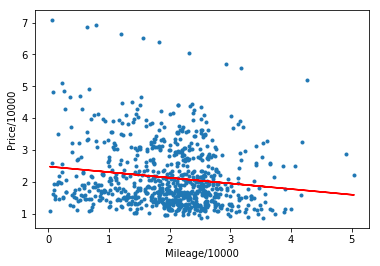

R^2: 0.020406167961526833


In [141]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import r2_score
import random

def LoadData():
    data =pd.read_excel('car_data.xls')
    return np.asarray(data)

def HuberLossFunction(X, y, W, sigma):
    N, D = X.shape
    fx = X.dot(W)
    res = y - fx
    res_abs = np.abs(res)

    idx_l = np.argwhere(res_abs<=sigma)
    idx_g = np.argwhere(res_abs>sigma)

    loss = 0.5*np.sum(res[idx_l[:,0]]**2) + sigma * np.sum(res_abs[idx_g[:,0]] - 0.5*sigma)
    loss /= N
    
    dW = -X[idx_l[:,0]].T.dot(res[idx_l[:,0]]) - sigma * np.sum(X[idx_g[:,0]]*np.sign(res[idx_g[:,0]]), axis=0).reshape(-1,1)
    dW = 1./N * dW

    return loss, dW

def train_Huber(X, y, sigma, learning_rate, num_iters, batch_size, flag=False):
    N, D = X.shape
    
    # initialize W
    W = 0.001 * np.random.randn(D, 1)
    
    # save loss 
    loss_history = []
    
    for it in range(num_iters):
        
        mask = np.random.choice(N, batch_size)
        X_batch = X[mask]
        y_batch = y[mask]
        
        loss, dW = HuberLossFunction(X_batch, y_batch, W, sigma)

        loss_history.append(float(loss))
        # update W
        W += - learning_rate*dW     
    return loss_history, W

def main():
    data=np.asarray(LoadData())
    
    X = data[:,1].reshape(-1,1).astype(np.float32)
    y = data[:,0].reshape(-1,1).astype(np.float32)
  
    # data rescale
    X /= 10000
    y /= 10000
    
    # add bias
    X = np.hstack((X, np.ones((X.shape[0],1))))
    
    sigma = 10
    learning_rate = 2e-2
    reg = 0
    num_iters = 10000
    batch_size = 800
    loss_history, W = train_Huber(X, y, sigma, learning_rate, num_iters, batch_size, flag=True)
    y_p = X.dot(W)
    plt.plot(X[:,0], y, '.')
    plt.plot(X[:,0], y_p, 'r-')
    plt.ylabel('Price/10000')
    plt.xlabel('Mileage/10000')
    plt.show()
    

    r2 = r2_score(y.reshape(-1), y_p.reshape(-1))
    print ('R^2:',r2)

if __name__ == "__main__":
    main()

    